1、激活函数

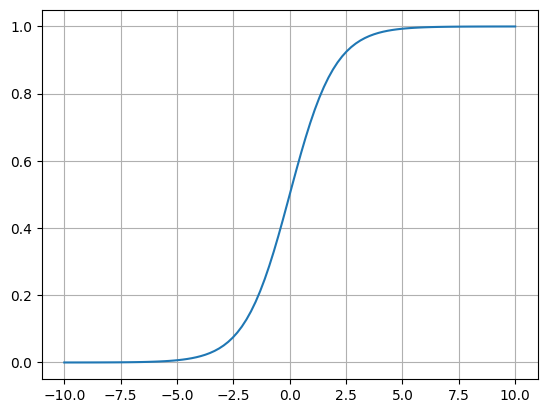

In [3]:
#sigmoid function
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow.keras as keras
x=np.linspace(-10,10,100)
y=tf.nn.sigmoid(x)
plt.plot(x,y)
plt.grid()

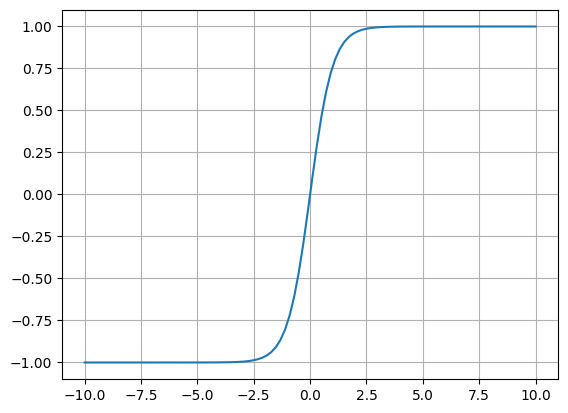

In [4]:
#tanh激活函数
y2=tf.nn.tanh(x)
plt.plot(x,y2)
plt.grid()

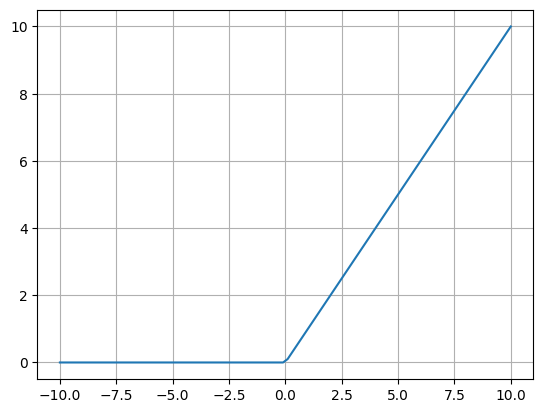

In [5]:
#relu激活函数
y3=tf.nn.relu(x)
plt.plot(x,y3)
plt.grid()

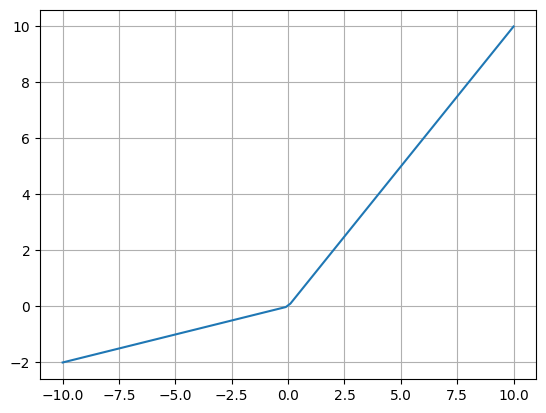

In [6]:
#leaky relu激活函数
y4=tf.nn.leaky_relu(x)
plt.plot(x,y4)
plt.grid()

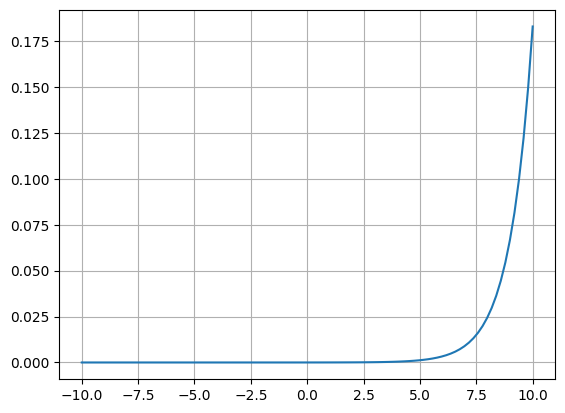

In [7]:
#softmax激活函数
y5=tf.nn.softmax(x)
plt.plot(x,y5)
plt.grid()

In [8]:
# 导⼊相应的⼯具包
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
# 数字中的score
x = tf.constant([0.2,0.02,0.15,1.3,0.5,0.06,1.1,0.05,3.75])
# 将其送⼊到softmax中计算分类结果
y = tf.nn.softmax(x) 
# 将结果进⾏打印
print(y)


tf.Tensor(
[0.02167152 0.01810158 0.02061459 0.06510484 0.02925349 0.01884031
 0.05330333 0.01865285 0.75445753], shape=(9,), dtype=float32)


2、参数初始化

In [9]:
#正态化Xavier初始化
# 导⼊⼯具包
import tensorflow as tf
# 进⾏实例化
initializer = tf.keras.initializers.glorot_normal()
# 采样得到权重值
values = initializer(shape=(9, 1))
# 打印结果
print(values)


tf.Tensor(
[[-0.2203448 ]
 [ 0.18848237]
 [ 0.02182175]
 [-0.19575463]
 [-0.31208462]
 [ 0.07257216]
 [-0.2619497 ]
 [-0.9632788 ]
 [-0.6057878 ]], shape=(9, 1), dtype=float32)


In [10]:
#标准化Xavier初始化
# 导⼊⼯具包
import tensorflow as tf
# 进⾏实例化
initializer = tf.keras.initializers.glorot_uniform()
# 采样得到权重值
values = initializer(shape=(9, 1))
# 打印结果
print(values)


tf.Tensor(
[[ 0.400962  ]
 [-0.3858623 ]
 [-0.58179486]
 [-0.6838927 ]
 [ 0.73476434]
 [ 0.05345565]
 [ 0.13240987]
 [ 0.3889979 ]
 [ 0.5456269 ]], shape=(9, 1), dtype=float32)


In [11]:
#He初始化
# 导⼊⼯具包
import tensorflow as tf
# 进⾏实例化
initializer = tf.keras.initializers.he_normal()
# 采样得到权重值
values = initializer(shape=(9, 1))
# 打印结果
print(values)


tf.Tensor(
[[-0.12963401]
 [-0.36143553]
 [ 0.08410032]
 [ 0.13092835]
 [-0.05179814]
 [ 0.06564823]
 [ 0.61643773]
 [-0.4577305 ]
 [-0.8445641 ]], shape=(9, 1), dtype=float32)


In [12]:
#标准化的he初始化
# 导⼊⼯具包
import tensorflow as tf
# 进⾏实例化
initializer = tf.keras.initializers.he_uniform()
# 采样得到权重值
values = initializer(shape=(9, 1))
# 打印结果
print(values)


tf.Tensor(
[[ 0.5102638 ]
 [-0.7871989 ]
 [-0.47450453]
 [-0.54015356]
 [-0.05231273]
 [-0.5374185 ]
 [ 0.649042  ]
 [ 0.0312767 ]
 [-0.1868059 ]], shape=(9, 1), dtype=float32)


3、 神经⽹络的搭建

In [13]:
#通过Sequential构建
# 导⼊相关的⼯具包
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# 定义⼀个Sequential模型，包含3层
model = keras.Sequential(
[
layers.Dense(3, activation='relu', kernel_initializer='he_normal',name="layer1", input_shape=(3,)),
layers.Dense(2, activation='relu', kernel_initializer='he_normal',name="layer2"),
layers.Dense(2, activation='relu', kernel_initializer='he_normal',name="layer3"),
],
name="my_sequential"
)

In [14]:
# 展示模型结果
model.summary()


Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 8         
_________________________________________________________________
layer3 (Dense)               (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 利⽤function API构建
# 导⼊⼯具包
import tensorflow as tf
# 定义模型的输⼊
inputs = tf.keras.Input(shape=(3,),name = "input")
# 第⼀层：激活函数为relu，其他默认
x = tf.keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal',name="layer1")(inputs)
# 第⼆层：激活函数为relu，其他默认
x = tf.keras.layers.Dense(2, activation='relu', kernel_initializer='he_normal',name="layer2")(x)
# 第三层：激活函数为sigmoid，其他默认
outputs = tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer='he_normal',name="layer3")(x)
# 使⽤Model来创建模型，指明输⼊和输出
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_model")



In [16]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 8         
_________________________________________________________________
layer3 (Dense)               (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


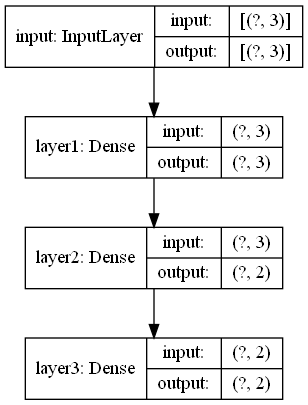

In [17]:
# 模型展示
keras.utils.plot_model(model,show_shapes=True)


In [19]:
#通过model的⼦类构建
# 导⼊⼯具包
import tensorflow as tf
# 定义model的⼦类
class MyModel(tf.keras.Model):
# 在init⽅法中定义⽹络的层结构
 def __init__(self):
    super(MyModel, self).__init__()
    # 第⼀层：激活函数为relu,权重初始化为he_normal
    self.layer1 = tf.keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal',name="layer1")
    # 第⼆层：激活函数为relu,权重初始化为he_normal
    self.layer2 = tf.keras.layers.Dense(2, activation='relu', kernel_initializer='he_normal',name="layer2")
    # 第三层：激活函数为sigmoid,权重初始化为he_normal
    self.layer3 = tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer='he_normal',name="layer3")
# 在call⽅法中定义前向传播
 def call(self, inputs):
    x = self.layer1(inputs)
    x = self.layer2(x)
    return self.layer3(x)
# 实例化模型
model = MyModel()
# 设置⼀个输⼊，调⽤模型（否则⽆法使⽤summay()）
x = tf.ones((1, 3))
y = model(x)
# 打印模型结构
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               multiple                  12        
_________________________________________________________________
layer2 (Dense)               multiple                  8         
_________________________________________________________________
layer3 (Dense)               multiple                  6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [1]:
#递归思想
def di_gui(n):
    print(n, "<===1====>")
    if n > 0:
        di_gui(n - 1)
    print(n, '<===2====>')


di_gui(5) # 外部调用后打印的结果是？


5 <===1====>
4 <===1====>
3 <===1====>
2 <===1====>
1 <===1====>
0 <===1====>
0 <===2====>
1 <===2====>
2 <===2====>
3 <===2====>
4 <===2====>
5 <===2====>
